# 2. Visualización de los datos 

In [10]:
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nameTrainCSV = 'trainWithListOfCleanWords'

train = pd.read_csv('../data/processed/' + nameTrainCSV + '.csv', encoding='utf-8')
train.head()


,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,listOfCleanWords,cleanWordsAsText
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"['explanation', 'edits', 'made', 'username', '...",explanation edits made username hardcore metal...
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"['aww', 'match', 'background', 'colour', 'seem...",aww match background colour seemingly stuck th...
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"['hey', 'man', 'really', 'trying', 'edit', 'wa...",hey man really trying edit war guy constantly ...
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"['make', 'real', 'suggestion', 'improvement', ...",make real suggestion improvement wondered sect...
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page']",sir hero chance remember page


In [3]:
nToxic = sum(train['toxic'])
nSevereToxic = sum(train['severe_toxic'])
nObscene = sum(train['obscene'])
nThreat = sum(train['threat'])
nInsult = sum(train['insult'])
nIdentityHate = sum(train['identity_hate'])


In [4]:
toxicity = np.array([nToxic, nSevereToxic, nObscene, nThreat, nInsult, nIdentityHate]) / len(train) * 100
N = len(toxicity)


In [5]:
toxicity

array([ 9.5844483 ,  0.99955506,  5.29482174,  0.29955318,  4.93636062,
        0.8804858 ])

In [6]:
np.arange(N)

array([0, 1, 2, 3, 4, 5])

## % de comentarios por clase

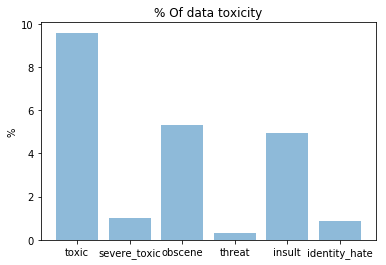

In [7]:
toxicLabels = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')
y_pos = np.arange(len(toxicLabels))
 
plt.bar(y_pos, toxicity, align='center', alpha=0.5)
plt.xticks(y_pos, toxicLabels)

plt.title('% Of data toxicity')
plt.ylabel('%')

plt.show()


# Media de nº de palabras por tamaño de documento

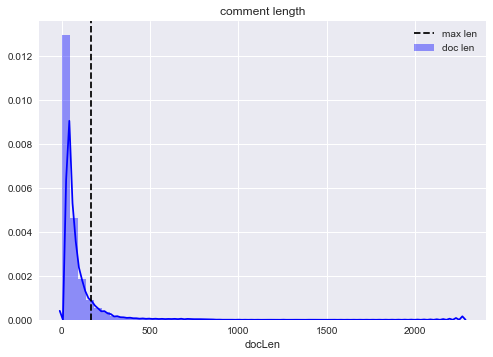

In [12]:
train['docLen'] = train['comment_text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train['docLen'].mean() + train['doc_len'].std()).astype(int)
sns.distplot(train['docLen'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()
